In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm
#import libraries

In [2]:
data = os.listdir('../input/project/dataset/')
data

['hardik_pandya',
 'Simon_Helberg',
 'celestine',
 'scarlett_johansson',
 'sylvester_stallone',
 'messi',
 'Jim_Parsons',
 'random_person',
 'samson',
 'mohamed_ali',
 'brad_pitt',
 'ronaldo',
 'Jennifer_Aniston',
 'victor',
 'dhoni',
 'pewdiepie',
 'blessing',
 'godswill',
 'Johnny_Galeck',
 'suresh_raina']

In [3]:
imageArray = []
labelArray = []

path = '../input/project/dataset/'

for i in range(len(data)):
    subFiles = os.listdir(path+data[i])
    for k in tqdm(range(len(subFiles))):
        try:
            images = cv2.imread(path+data[i]+"/"+subFiles[k])
            images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
            images = cv2.resize(images, (96, 96))
            
            imageArray.append(images)
            labelArray.append(i)
            
        except:
            pass
            

100%|██████████| 319/319 [00:03<00:00, 98.09it/s] 


In [4]:
import gc
gc.collect()
#clear memory

23

In [5]:
imageArray[0]

array([[[247, 234, 226],
        [247, 234, 227],
        [224, 209, 206],
        ...,
        [128, 102, 103],
        [197, 169, 165],
        [213, 183, 175]],

       [[246, 233, 225],
        [246, 233, 226],
        [221, 206, 203],
        ...,
        [158, 131, 131],
        [210, 180, 175],
        [216, 185, 175]],

       [[246, 233, 225],
        [246, 234, 227],
        [225, 210, 207],
        ...,
        [183, 154, 153],
        [217, 185, 180],
        [219, 185, 175]],

       ...,

       [[ 19,  16,  33],
        [ 17,  14,  32],
        [ 17,  16,  34],
        ...,
        [ 47,  40,  58],
        [ 47,  40,  57],
        [ 46,  39,  55]],

       [[ 19,  16,  33],
        [ 18,  15,  33],
        [ 16,  15,  33],
        ...,
        [ 47,  39,  57],
        [ 47,  39,  58],
        [ 46,  38,  57]],

       [[ 19,  16,  33],
        [ 17,  14,  32],
        [ 16,  15,  33],
        ...,
        [ 48,  39,  58],
        [ 48,  39,  60],
        [ 47,  38,  59]]

In [6]:
labelArray[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [7]:
imageArray = np.array(imageArray)/255.0
labelArray = np.array(labelArray)

In [8]:
imageArray[0]

array([[[0.96862745, 0.91764706, 0.88627451],
        [0.96862745, 0.91764706, 0.89019608],
        [0.87843137, 0.81960784, 0.80784314],
        ...,
        [0.50196078, 0.4       , 0.40392157],
        [0.77254902, 0.6627451 , 0.64705882],
        [0.83529412, 0.71764706, 0.68627451]],

       [[0.96470588, 0.91372549, 0.88235294],
        [0.96470588, 0.91372549, 0.88627451],
        [0.86666667, 0.80784314, 0.79607843],
        ...,
        [0.61960784, 0.51372549, 0.51372549],
        [0.82352941, 0.70588235, 0.68627451],
        [0.84705882, 0.7254902 , 0.68627451]],

       [[0.96470588, 0.91372549, 0.88235294],
        [0.96470588, 0.91764706, 0.89019608],
        [0.88235294, 0.82352941, 0.81176471],
        ...,
        [0.71764706, 0.60392157, 0.6       ],
        [0.85098039, 0.7254902 , 0.70588235],
        [0.85882353, 0.7254902 , 0.68627451]],

       ...,

       [[0.0745098 , 0.0627451 , 0.12941176],
        [0.06666667, 0.05490196, 0.1254902 ],
        [0.06666667, 0

In [9]:

from sklearn.model_selection import train_test_split
#clear memory

In [10]:
X_train, x_test, Y_train, y_test = train_test_split(imageArray, labelArray, test_size=0.15) #20% for testing
#clear memory

In [11]:
from keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout
from keras import layers, optimizers, callbacks, applications
from keras.callbacks import ModelCheckpoint


In [12]:
import tensorflow as tf

efficient_net = tf.keras.applications.EfficientNetB0(
weights= 'imagenet',
input_shape = (96,96,3),
include_top = False)


2022-12-23 13:26:39.297282: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 13:26:39.298263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 13:26:39.560506: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 13:26:39.561437: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 13:26:39.562237: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

16719872/16705208 [==============================] - 0s 0us/step


In [13]:
model = Sequential()
model.add(efficient_net)
model.add(layers.GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(layers.Dense(1))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 3, 3, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 4,050,852
Trainable params: 4,008,829
Non-trainable params: 42,023
_________________________________________________________________


In [14]:
#from tensorflow.keras.optimizers import Adam
#model.compile(optimizer = Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mae'])

In [15]:
checkpoint_filepath = 'trained_model/best_model'

custom_callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_mae',
    factor=0.9,
    patience=5,
    verbose=1,
    mode='auto',
    cooldown=0,
    min_lr=1e-6
   
),
    ModelCheckpoint(
        filepath = checkpoint_filepath,
        monitor = 'val_mae',
        mode = 'auto',
        verbose = 1,
        save_best_only = True,
        save_weights_only = True
    )
]

In [16]:
import time
start_time = time.time()

num_epochs = 300
batch_size =64

history = model.fit(
    X_train, Y_train,
    epochs = num_epochs,
    batch_size= batch_size,
    validation_data = (x_test, y_test),
    callbacks = custom_callbacks
)

print(history.history)

print("--- %s seconds ---" % (time.time() - start_time))

2022-12-23 13:26:47.400139: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 808316928 exceeds 10% of free system memory.
2022-12-23 13:26:48.333839: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 808316928 exceeds 10% of free system memory.
2022-12-23 13:26:49.010671: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


2022-12-23 13:26:58.413446: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


115/115 [==============================] - 38s 151ms/step - loss: 19.8039 - mae: 3.2549 - val_loss: 31.7974 - val_mae: 4.8461

Epoch 00001: val_mae improved from inf to 4.84613, saving model to trained_model/best_model
Epoch 2/300
115/115 [==============================] - 15s 127ms/step - loss: 2.5752 - mae: 1.1196 - val_loss: 55.9376 - val_mae: 6.0131

Epoch 00006: val_mae did not improve from 3.77322
Epoch 7/300
115/115 [==============================] - 15s 127ms/step - loss: 2.0568 - mae: 0.9805 - val_loss: 29.0986 - val_mae: 4.0764

Epoch 00007: val_mae did not improve from 3.77322
Epoch 8/300
115/115 [==============================] - 15s 128ms/step - loss: 1.6904 - mae: 0.9183 - val_loss: 69.4517 - val_mae: 6.8853

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0009000000427477062.

Epoch 00008: val_mae did not improve from 3.77322
Epoch 9/300
115/115 [==============================] - 14s 126ms/step - loss: 1.4884 - mae: 0.8499 - val_loss: 60.2494 - val_mae: 6.2985

In [17]:
model.load_weights(checkpoint_filepath)

In [18]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tensorflow_lite_model = converter.convert()

with open('best_model.tflite', 'wb') as f:
    f.write(tensorflow_lite_model)
    

2022-12-23 14:40:15.216852: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
2022-12-23 14:40:40.637088: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 14:40:40.637728: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 14:40:40.638431: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8

In [19]:
preds = model.predict(x_test, batch_size=64)
preds[:15]

array([[ 5.9529586],
       [ 6.955743 ],
       [ 7.0574546],
       [18.994774 ],
       [17.971582 ],
       [10.931372 ],
       [ 7.030874 ],
       [ 3.0231957],
       [ 6.004582 ],
       [ 3.0452628],
       [13.936548 ],
       [ 7.0187516],
       [ 6.0264144],
       [ 6.98759  ],
       [17.945398 ]], dtype=float32)

In [20]:
y_test[:15]

array([ 6,  7, 10, 14, 18, 11,  7,  3,  6,  3, 14,  7,  6,  7, 18])

In [21]:
y_test[:15]

array([ 6,  7, 10, 14, 18, 11,  7,  3,  6,  3, 14,  7,  6,  7, 18])

In [22]:
gc.collect()

38208

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [24]:
def get_classification_metric(testy, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(testy, probs)
    # convert to f score
    fscore = 2 * (precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    return fscore[ix]

In [25]:
print("Accuracy: ", get_classification_metric(y_test.round(), preds.round())*100)

ValueError: multiclass format is not supported

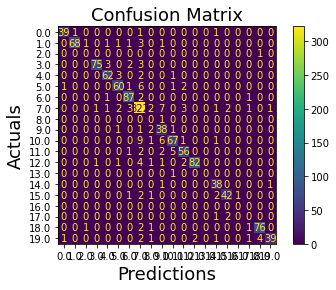

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
print(ConfusionMatrixDisplay.from_predictions(y_test.round(), preds.round(), normalize=None))

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
plt.savefig('Confusion_Mat.png')


In [28]:
print(accuracy_score(y_test.round(), preds.round(), normalize=True, sample_weight=None)*100)

89.2248062015504


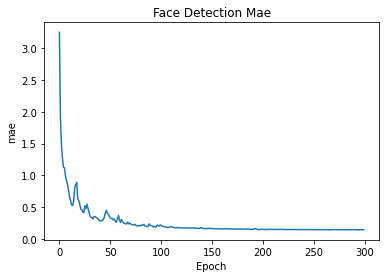

In [30]:

#print(history.history)
plt.plot(history.history['mae'])
plt.title('Face Detection Mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.show()